In [120]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
# Lendos os dados
descriptions_ad = pd.read_parquet('../data/raw/descriptions_vaga_Analista.parquet')
descriptions_cd = pd.read_parquet('../data/raw/descriptions_vaga_Cientista.parquet')
headers_cd = pd.read_parquet('../data/raw/headers_Cientista.parquet')
headers_ad = pd.read_parquet('../data/raw/headers_Analista.parquet')

# Limpando os headers

Para a etapa de limpeza, os seguintes passos foram levados em consideração:

1. Remover pontuações
2. Normalizar a case
3. Remover Stopwords

Palavras adicionais, como nomes de empresas também foram removidas.

## Analista de Dados

In [122]:
# Verificando os primeiros valores
headers_ad.head()

,Header
0,Analista de Dados | BI | Power BI | Analytics ...
1,Administrador | Analista de dados | Power BI |...
2,Analista de Dados @ Sicredi
3,Analista de Dados | Gestor Comercial
4,Analista de dados na Rapidanet


In [123]:
# Removendo as pontuações e deixando tudo em minúsculo
headers_ad['Header'] = [re.sub('\W', ' ', header).lower().split() for header in headers_ad['Header']]


In [124]:
# Obtendo uma lista de stopwords em português
stop_words = stopwords.words('portuguese')

# Adiciona palavras referentes a instituições de ensino e empresas na lista de stopwords
stop_words_adicionais = ["senac", "claro", "fab", "ufrgs", "banrisul", "sesc",
                         "sicredi", "ilegra", "fundacred", "preditiva", "rbs",
                         "bptech", "porto", "serede", "dell", "renner", 
                         "sescoop", "rapidanet"]

stop_words.extend(stop_words_adicionais)

In [125]:
# Criando função anonima para remover as stop words de cada lista de palavras
remove_stopwords = lambda words: [word for word in words if word not in stop_words]

# Aplica a função anonima em cada lista de palavras
headers_ad['Header'] = headers_ad['Header'].apply(remove_stopwords)

In [126]:
# Junta as listas em frases novamente
headers_ad['Header'] = [' '.join(header) for header in headers_ad['Header']]

In [127]:
# Junta tudo em uma única string
sumario_ad = ' '.join(headers_ad['Header'])

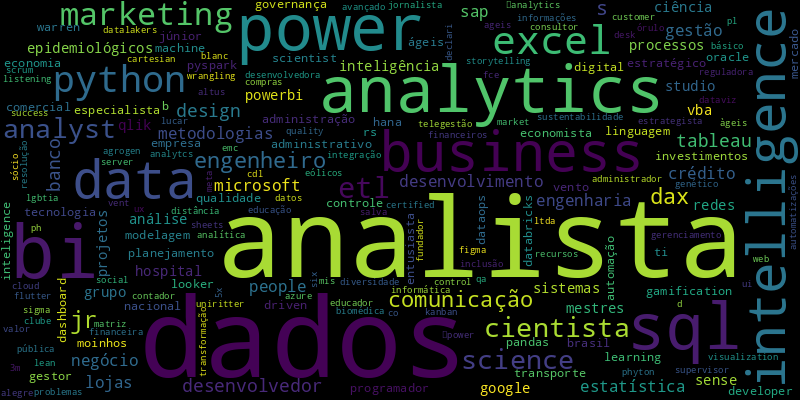

In [128]:
# Cria a nuvem de palavras
WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(sumario_ad).to_image()

In [129]:
# Busca as 10 palavras mais frequentes
sessenta_mais_frequentes_ad = headers_ad.Header.str.split(expand=True).stack().value_counts()[:60]
sessenta_mais_frequentes_ad = sessenta_mais_frequentes_ad.to_frame()
sessenta_mais_frequentes_ad = sessenta_mais_frequentes_ad.reset_index().rename(columns={'index': 'Palavra', 'count': 'Frequência'})

In [130]:
# Cria uma lista com as 60 palavras mais frequentes
lista_mais_comuns = sessenta_mais_frequentes_ad.Palavra.values.tolist()

In [131]:
# Transforma as frases em uma lista só
headers_ad_stacked = headers_ad.Header.str.split(expand=True).stack().to_frame()

# Reseta o index
headers_ad_stacked = headers_ad_stacked.reset_index()

# Exclui as colunas de level
headers_ad_stacked = headers_ad_stacked.drop(["level_0", "level_1"], axis=1)

# Renomeia a coluna
headers_ad_stacked.columns = ["value"]

# Retorna apenas os valores que estão nas sessenta palavras mais comuns
headers_ad_stacked = headers_ad_stacked.query(f"value in @lista_mais_comuns")

In [132]:
# Salvando os dados para uso no tableau
headers_ad_stacked.to_csv('../data/created_from_raw/headers_analista.csv', index=False)

## Cientista de Dados

In [133]:
# Verificando os primeiros valores
headers_cd.head()

,Header
0,Cientista de Dados | Data Scientist
1,Data Scientist | Cientista de Dados
2,Administrador | Cientista de Dados
3,Professor | Pesquisador | Físico | Cientista d...
4,Cientista de dados


In [134]:
# Removendo as pontuações e deixando tudo em minúsculo
headers_cd['Header'] = [re.sub('\W', ' ', header).lower().split() for header in headers_cd['Header']]


In [135]:
# Obtendo uma lista de stopwords em português
stop_words = stopwords.words('portuguese')

# Adiciona palavras referentes a instituições de ensino e empresas na lista de 
# stopwords
stop_words_adicionais = ["ipiranga", "accenture", "poatek", "picpay", 
                         "neurotech", "boticário", "bradesco", "ufrgs", 
                         "unibanco", "americanas", "itaú", "gavb", "loft", 
                         "nestlé"]
stop_words.extend(stop_words_adicionais)

In [136]:
# Criando função anonima para remover as stop words de cada lista de palavras
remove_stopwords = lambda words: [word for word in words if word not in stop_words]

# Aplica a função anonima em cada lista de palavras
headers_cd['Header'] = headers_cd['Header'].apply(remove_stopwords)

In [137]:
# Junta as listas em frases novamente
headers_cd['Header'] = [' '.join(header) for header in headers_cd['Header']]

In [138]:
# Junta tudo em uma única string
sumario_cd = ' '.join(headers_cd['Header'])

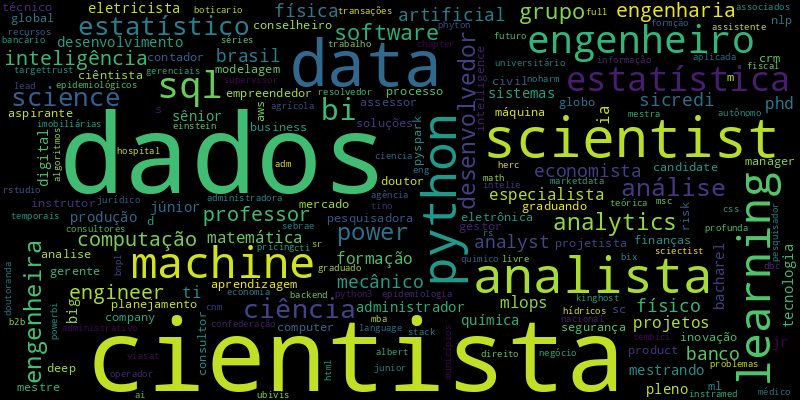

In [139]:
# Cria a nuvem de palavras
WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(sumario_cd).to_image()

In [140]:
# Busca as 10 palavras mais frequentes
sessenta_mais_frequentes_cd = headers_cd.Header.str.split(expand=True).stack().value_counts()[:60]
sessenta_mais_frequentes_cd = sessenta_mais_frequentes_cd.to_frame()
sessenta_mais_frequentes_cd = sessenta_mais_frequentes_cd.reset_index().rename(columns={'index': 'Palavra', 'count': 'Frequência'})

In [141]:
# Cria uma lista com as 60 palavras mais frequentes
lista_mais_comuns = sessenta_mais_frequentes_cd.Palavra.values.tolist()

In [142]:
# Transforma as frases em uma lista só
headers_cd_stacked = headers_cd.Header.str.split(expand=True).stack().to_frame()

# Reseta o index
headers_cd_stacked = headers_cd_stacked.reset_index()

# Exclui as colunas de level
headers_cd_stacked = headers_cd_stacked.drop(["level_0", "level_1"], axis=1)

# Renomeia a coluna
headers_cd_stacked.columns = ["value"]

# Retorna apenas os valores que estão nas sessenta palavras mais comuns
headers_cd_stacked = headers_cd_stacked.query(f"value in @lista_mais_comuns")

In [143]:
# Salvando os dados para uso no tableau
headers_cd_stacked.to_csv('../data/created_from_raw/headers_cientista.csv', index=False)

# Limpando as vagas

Para a etapa de limpeza, os seguintes passos foram levados em consideração:

1. Remover pontuações
2. Normalizar a case
3. Remover Stopwords

Palavras adicionais, como nomes de empresas e palavras comuns em descrições de 
vagas, como **requisitos** ou **benefícios** também foram removidas.

## Analista de Dados

In [144]:
# Verificando os primeiros valores
descriptions_ad.head()

,Descricao_da_Vaga
0,Job DescriptionNós estamos procurando um talen...
1,"Olá!Somos a @Runtalent, com DNA inovador, somo..."
2,"Com 50 anos de história, a Acipar é empresa re..."
3,Job DescriptionSe você gosta de possibilidades...
4,Quais serão suas responsabilidadesInterpretar ...


In [145]:
# Removendo as pontuações e deixando tudo em minúsculo
descriptions_ad['Descricao_da_Vaga'] = [re.sub('\W', ' ', description).lower().split() for description in descriptions_ad['Descricao_da_Vaga']]


In [146]:
# Criando função para remover números de cada lista de palavras
remove_numbers = lambda words: [word for word in words if not word.isdigit()]

# Aplica a função em cada lista de palavras
descriptions_ad['Descricao_da_Vaga'] = descriptions_ad['Descricao_da_Vaga'].apply(remove_numbers)

In [147]:
# Obtendo uma lista de stopwords em português
stop_words = stopwords.words('portuguese')

# Adiciona palavras referentes a instituições de ensino e empresas na lista de 
# stopwords
stop_words_adicionais = ["experiência", "conhecimento", "pessoas", "áreas", 
                         "dia", "empresa", "and", "desenvolvimento", "time",
                         "processos", "trabalho", "negócios", "auxílio", 
                         "tecnologia", "soluções", "ferramentas", "análises",
                         "resultados", "trabalhar", "clientes", "fazer", "vida",
                         "área", "cliente", "informações", "vale", "aqui", 
                         "diferencial", "oportunidades", "relatórios", "me",
                         "diferencial", "equipe", "the", "insights", "parte",
                         "produtos", "negócio", "brasil", "comunicação", 
                         "capacidade", "cultura", "habilidades", "mundo", 
                         "saúde", "desenvolver", "todas", "analisar", 
                         "requisitos", "mercado", "oportunidade", "criação",
                         "apoiar", "ter", "gente", "apoiar", "todos", 
                         "refeição", "diferentes", "requirements", "gympass",
                         "decisões", "plano", "digital", "tendência", 
                         "construir", "compra", "avançado", "assistência",
                         "busca", "transformação", "realizar", "construir", 
                         "benefício", "ambiente", "carreira", "base", "junto", 
                         "sobre", "todo", "seguro", "processos", "time", "além",
                         "empresas", "alimentação", "objetivo", "ano", "boa",
                         "desafio", "grande", "times", "benefícios", "projeto",
                         "responsabilidade", "desconto", "ensino", "superior", 
                         "sonho", "vaga"]
stop_words.extend(stop_words_adicionais)

In [148]:
# Criando função anonima para remover as stop words de cada lista de palavras
remove_stopwords = lambda words: [word for word in words if word not in stop_words]

# Aplica a função anonima em cada lista de palavras
descriptions_ad['Descricao_da_Vaga'] = descriptions_ad['Descricao_da_Vaga'].apply(remove_stopwords)

In [149]:
# Junta as listas em frases novamente
descriptions_ad['Descricao_da_Vaga'] = [' '.join(descricao) for descricao in descriptions_ad['Descricao_da_Vaga']]

In [150]:
# Junta tudo em uma única string
sumario_vagas_ad = ' '.join(descriptions_ad['Descricao_da_Vaga'])

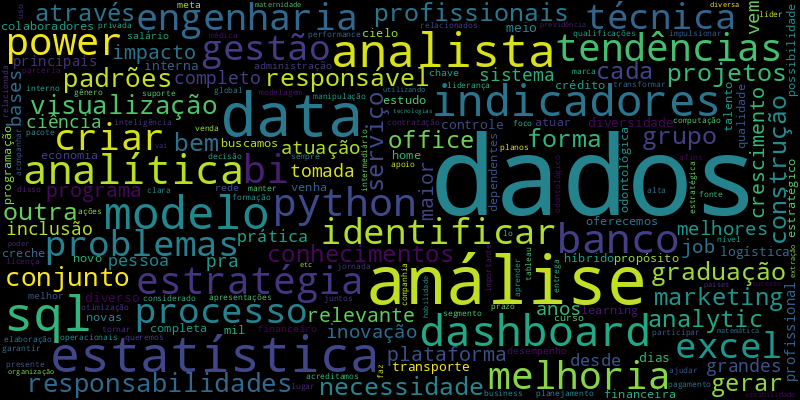

In [151]:
# Cria a nuvem de palavras
WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(sumario_vagas_ad).to_image()

In [152]:
# Busca as 150 palavras mais frequentes
cento_e_cinquenta_mais_frequentes_ad = descriptions_ad.Descricao_da_Vaga.str.split(expand=True).stack().value_counts()[:150]
cento_e_cinquenta_mais_frequentes_ad = cento_e_cinquenta_mais_frequentes_ad.to_frame()
cento_e_cinquenta_mais_frequentes_ad = cento_e_cinquenta_mais_frequentes_ad.reset_index().rename(columns={'index': 'Palavra', 'count': 'Frequência'})

In [153]:
# Cria uma lista com as 60 palavras mais frequentes
lista_mais_comuns = cento_e_cinquenta_mais_frequentes_ad.Palavra.values.tolist()

In [154]:
# Transforma as frases em uma lista só
descriptions_ad_stacked = descriptions_ad.Descricao_da_Vaga.str.split(expand=True).stack().to_frame()

# Reseta o index
descriptions_ad_stacked = descriptions_ad_stacked.reset_index()

# Exclui as colunas de level
descriptions_ad_stacked = descriptions_ad_stacked.drop(["level_0", "level_1"], axis=1)

# Renomeia a coluna
descriptions_ad_stacked.columns = ["value"]

# Retorna apenas os valores que estão nas sessenta palavras mais comuns
descriptions_ad_stacked = descriptions_ad_stacked.query(f"value in @lista_mais_comuns")

In [155]:
# Salvando os dados para uso no tableau
descriptions_ad_stacked.to_csv('../data/created_from_raw/descriptions_jobs_analista.csv', index=False)

## Cientista de Dados

In [156]:
# Verificando os primeiros valores
descriptions_cd.head()

,Descricao_da_Vaga
0,Nosso cliente está em busca de um profissional...
1,
2,Atividades Projetos de desenvolvimento de prod...
3,Job DescriptionSe você gosta de possibilidades...
4,Superior completo ou em andamento em: Engenhar...


In [157]:
# Removendo as pontuações e deixando tudo em minúsculo
descriptions_cd['Descricao_da_Vaga'] = [re.sub('\W', ' ', description).lower().split() for description in descriptions_cd['Descricao_da_Vaga']]


In [158]:
# Criando função para remover números de cada lista de palavras
remove_numbers = lambda words: [word for word in words if not word.isdigit()]

# Aplica a função em cada lista de palavras
descriptions_cd['Descricao_da_Vaga'] = descriptions_cd['Descricao_da_Vaga'].apply(remove_numbers)

In [159]:
# Obtendo uma lista de stopwords em português
stop_words = stopwords.words('portuguese')

# Adiciona palavras referentes a instituições de ensino e empresas na lista de 
# stopwords
stop_words_adicionais = ["and", "the", "to", "of", "in", "for", "with", "a",
                         "experiẽncia", "conhecimento", "time", "área", 
                         "pessoa", "negócio", "experience", "fazer", "ambiente",
                         "brasil", "experiência", "saúde", "trabalho", "vaga"
                         "empresa", "dia", "pessoas", "áreas", "company", 
                         "world", "ferramenta", "desenvolvimento", "cliente",
                         "negócios", "serviço", "soluções", "is", "s", 
                         "tecnologia", "requirements", "will", "that", 
                         "ferramentas", "job", "etc", "clientes", "parte", "be",
                         "vida", "oportunidade", "vale", "empresa", "processo",
                         "idade", "technology", "todo", "toda", "forma", 
                         "turing", "melhores", "aqui", "equipe", "benefício",
                         "requisito", "engenharia", "processos", "ibm", 
                         "knowledge", "ter", "sobre", "produto", "requisitos",
                         "empresas", "outro", "vaga", "projeto", "cada", 
                         "desenvolvedores", "gente", "resultados", "grande", 
                         "globo", "habilidades", "produto", "mundo", "sonho",
                         "bem", "oportunidades", "técnica", "todos", "produtos",
                         "programa", "trabalhar", "desafio", "conhecimentos",
                         "outros", "novo", "johnson", "outras", "melhor", 
                         "seguro", "benefícios", "todas"]
stop_words.extend(stop_words_adicionais)

In [160]:
# Criando função anonima para remover as stop words de cada lista de palavras
remove_stopwords = lambda words: [word for word in words if word not in stop_words]

# Aplica a função anonima em cada lista de palavras
descriptions_cd['Descricao_da_Vaga'] = descriptions_cd['Descricao_da_Vaga'].apply(remove_stopwords)

In [161]:
# Junta as listas em frases novamente
descriptions_cd['Descricao_da_Vaga'] = [' '.join(descricao) for descricao in descriptions_cd['Descricao_da_Vaga']]

In [162]:
# Junta tudo em uma única string
sumario_vagas_cd = ' '.join(descriptions_cd['Descricao_da_Vaga'])

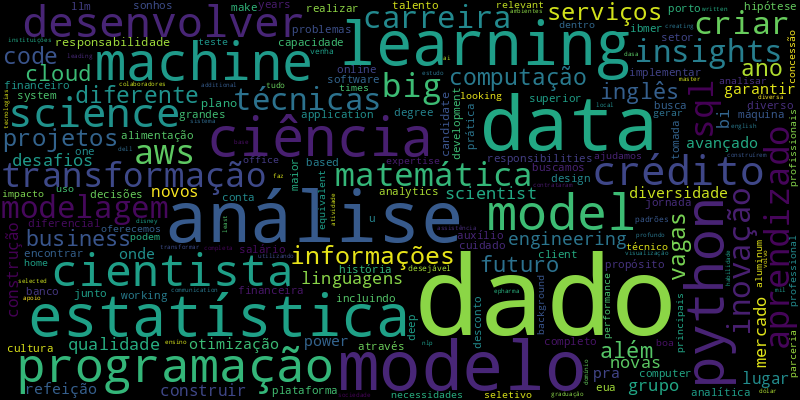

In [163]:
# Cria a nuvem de palavras
WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(sumario_vagas_cd).to_image()

In [164]:
# Busca as 150 palavras mais frequentes
cento_e_cinquenta_mais_frequentes_cd = descriptions_cd.Descricao_da_Vaga.str.split(expand=True).stack().value_counts()[:150]
cento_e_cinquenta_mais_frequentes_cd = cento_e_cinquenta_mais_frequentes_cd.to_frame()
cento_e_cinquenta_mais_frequentes_cd = cento_e_cinquenta_mais_frequentes_cd.reset_index().rename(columns={'index': 'Palavra', 'count': 'Frequência'})

In [165]:
# Cria uma lista com as 60 palavras mais frequentes
lista_mais_comuns = cento_e_cinquenta_mais_frequentes_cd.Palavra.values.tolist()

In [166]:
# Transforma as frases em uma lista só
descriptions_cd_stacked = descriptions_cd.Descricao_da_Vaga.str.split(expand=True).stack().to_frame()

# Reseta o index
descriptions_cd_stacked = descriptions_cd_stacked.reset_index()

# Exclui as colunas de level
descriptions_cd_stacked = descriptions_cd_stacked.drop(["level_0", "level_1"], axis=1)

# Renomeia a coluna
descriptions_cd_stacked.columns = ["value"]

# Retorna apenas os valores que estão nas sessenta palavras mais comuns
descriptions_cd_stacked = descriptions_cd_stacked.query(f"value in @lista_mais_comuns")

In [168]:
# Salvando os dados para uso no tableau
descriptions_cd_stacked.to_csv('../data/created_from_raw/descriptions_jobs_cientista.csv', index=False)